In [ ]:
#pip install yfinance

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


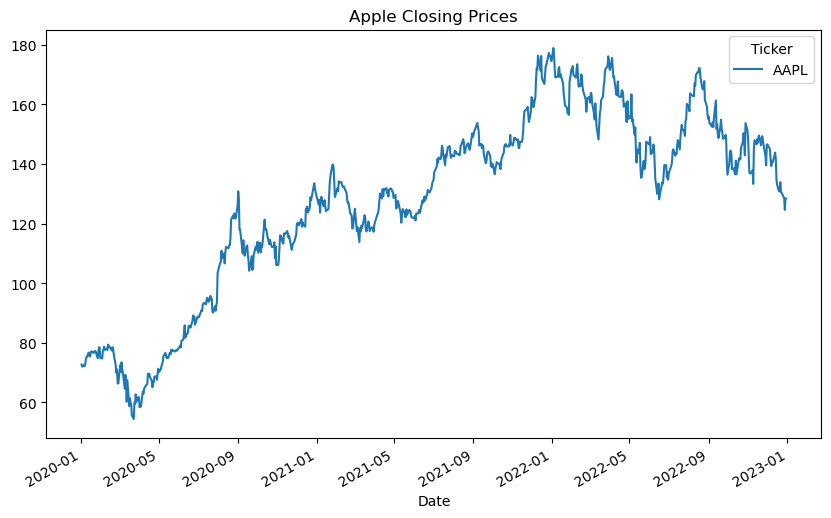

In [2]:
# Download data
df = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Plot Closing Price
df['Close'].plot(title='Apple Closing Prices', figsize=(10,6))
plt.show()

In [9]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200
...,...,...,...,...,...
2022-12-23,130.344467,130.898028,128.149982,129.415269,63814900
2022-12-27,128.535538,129.899682,127.240596,129.870028,69007800


In [33]:
# Use only 'Close' price
close_prices = df['Close'].values.reshape(-1,1)

# Scale between 0 and 1
scaler = MinMaxScaler()
close_prices_scaled = scaler.fit_transform(close_prices)

# Prepare sequences
X = []
y = []
timesteps = 60

for i in range(timesteps, len(close_prices_scaled)):
    #print(i-timesteps)
    #print(f'i:{i}')
    X.append(close_prices_scaled[i-timesteps:i, 0])
    y.append(close_prices_scaled[i, 0])

print(X[0]) # List Object
X, y = np.array(X), np.array(y)
print(X.shape) # Array
print(X)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape to 3D (samples, timesteps, features)
print(X.shape)
print(X.shape[0])
print(X.shape[1])
print(X)


[0.14679887 0.14111726 0.14572856 0.14298521 0.15232455 0.16485495
 0.16621682 0.17911701 0.17078936 0.16818201 0.17577039 0.18256093
 0.17835818 0.1805568  0.18353357 0.18174373 0.16353184 0.1805373
 0.19347625 0.19256186 0.16462147 0.16296775 0.18279448 0.18785307
 0.19516902 0.18656791 0.18953248 0.18574899 0.20055197 0.19600763
 0.19616386 0.18455924 0.19356981 0.18709461 0.17295494 0.14395349
 0.12425527 0.13316817 0.09585839 0.09554649 0.14518218 0.12667377
 0.15284701 0.13369499 0.1261079  0.08152368 0.11891133 0.09958351
 0.04653476 0.10453762 0.03479376 0.05556477 0.04349232 0.03980614
 0.00949805 0.         0.04390182 0.0412494  0.06644758 0.04557914]
(696, 60)
[[0.14679887 0.14111726 0.14572856 ... 0.0412494  0.06644758 0.04557914]
 [0.14111726 0.14572856 0.14298521 ... 0.06644758 0.04557914 0.05936785]
 [0.14572856 0.14298521 0.15232455 ... 0.04557914 0.05936785 0.05835367]
 ...
 [0.69219362 0.72114227 0.72352165 ... 0.61287736 0.60993781 0.59540008]
 [0.72114227 0.72352165

In [16]:
i

755

In [15]:
X

array([[[0.14679887],
        [0.14111726],
        [0.14572856],
        ...,
        [0.0412494 ],
        [0.06644758],
        [0.04557914]],

       [[0.14111726],
        [0.14572856],
        [0.14298521],
        ...,
        [0.06644758],
        [0.04557914],
        [0.05936785]],

       [[0.14572856],
        [0.14298521],
        [0.15232455],
        ...,
        [0.04557914],
        [0.05936785],
        [0.05835367]],

       ...,

       [[0.69219362],
        [0.72114227],
        [0.72352165],
        ...,
        [0.61287736],
        [0.60993781],
        [0.59540008]],

       [[0.72114227],
        [0.72352165],
        [0.71582861],
        ...,
        [0.60993781],
        [0.59540008],
        [0.56370226]],

       [[0.72352165],
        [0.71582861],
        [0.67347619],
        ...,
        [0.59540008],
        [0.56370226],
        [0.59206346]]])

In [34]:
model = Sequential()
print(X.shape[1])
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

60


/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1630
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0044
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0025
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0024
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0021
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0021
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0019
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0020
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0023
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0019
Epoch 13/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017
Epoch 14/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0020
Epoch 15/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0019
Epoc

In [6]:
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Rescale back

# Original prices
real_prices = scaler.inverse_transform(close_prices_scaled[timesteps:])

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


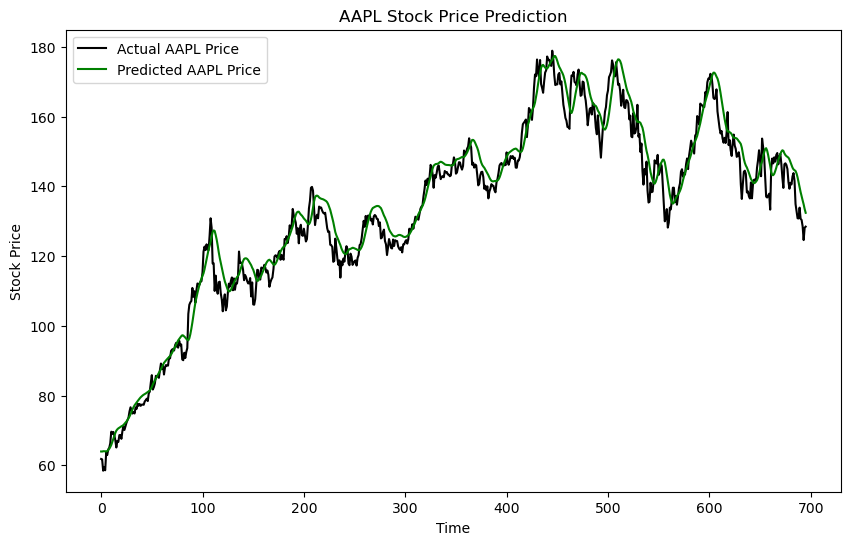

In [7]:
plt.figure(figsize=(10,6))
plt.plot(real_prices, color='black', label='Actual AAPL Price')
plt.plot(predicted_prices, color='green', label='Predicted AAPL Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [21]:
# Create a 1D array
arr = np.array([1, 2, 3, 4, 5, 6])
print("Original array:", arr)

# Reshape to a 2D array with 2 rows and 3 columns
reshaped_arr = arr.reshape(2, 3)
print("Reshaped array (2x3):\n", reshaped_arr)

# Reshape to a 2D array with 3 rows and 2 columns
reshaped_arr = arr.reshape(3, 2)
print("Reshaped array (3x2):\n", reshaped_arr)

# Reshape to a 3D array
reshaped_arr = arr.reshape(1, 2, 3)
print("Reshaped array (1x2x3):\n", reshaped_arr)

# Using -1 to infer dimension
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
reshaped_arr = arr.reshape(2, 2, -1)
print("Reshaped array with -1:\n", reshaped_arr)

Original array: [1 2 3 4 5 6]
Reshaped array (2x3):
 [[1 2 3]
 [4 5 6]]
Reshaped array (3x2):
 [[1 2]
 [3 4]
 [5 6]]
Reshaped array (1x2x3):
 [[[1 2 3]
  [4 5 6]]]
Reshaped array with -1:
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
